In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("Classification_temp.csv")
df.head()

,Age,Can_buy
0,28,0
1,15,0
2,55,1
3,36,0
4,56,1


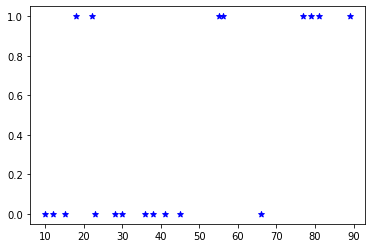

In [134]:
plt.scatter(df.Age,df.Can_buy,marker='*',color='blue')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']],df.Can_buy,train_size=0.8)

In [19]:
X_test

,Age
1,15
11,41
16,38
4,56


In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
X_test

,Age
1,15
11,41
16,38
4,56


In [164]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 1], dtype=int64)

In [161]:
print(X_test)
print(" Not Buying","| May Buy")
h = model.predict_proba(X_test)
print(h)

    Age
1    15
11   41
16   38
4    56
 Not Buying | May Buy
[[0.8299445  0.1700555 ]
 [0.57860113 0.42139887]
 [0.61381198 0.38618802]
 [0.39780471 0.60219529]]


In [25]:
model.score(X_test,y_test)

1.0

In [30]:
X_test

,Age
1,15
11,41
16,38
4,56


In [31]:
y_predicted

array([0, 0, 0, 1], dtype=int64)

#### model.coef_ indicates value of m in y = mx + c equation

In [38]:
model.coef_

array([[0.04877694]])

#### model.intercept_ indicates value of c in y = mx + c equation

In [37]:
model.intercept_

array([-2.31688806])

### Defining Sigmoid Function and calculating manually

In [39]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [126]:
def prediction_function(age):
    global y
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    
    if (y*100) < 50:
        print("Predicted Value = {:.5f} < 50, hence set as 0, i.e, person with age {} doesn't have capacity to buy a lambo".format(y,age))
    
    else:
        print("Predicted Value = {:.2f} > 50, hence set as 1, i.e, person with age {} might have capacity to buy a lambo".format(y,age))
        
    return y*100

In [165]:
age = 36                    #so here the threshold is 36
prediction_function(age)

Predicted Value = 0.49550 < 50, hence set as 0, i.e, person with age 36 doesn't have capacity to buy a lambo


49.55001214960635

In [172]:
age = 56                    #so here the threshold is 36
prediction_function(age)

Predicted Value = 0.69 > 50, hence set as 1, i.e, person with age 56 might have capacity to buy a lambo


69.46607195950969